<h2>Question 2 (100 Points): Experiments on Non-Linear Activation Function</h2>


- Your dataset for this experiment is CIFAR-10. This dataset is readily available on all
deep learning framework like (PyTorch, TensorFlow).
- Create a four-layer convolutional Neural Network for CIFAR-10 dataset and do the
experiments to get the similar graph.
- Train your network until you get <= 25% training error. Once your training error
reaches 25% stop your training.
- Note: You need to create two experiments with “ReLU”, “Tanh”, activation function s
in the hidden layers. Note that one model will use only “ReLU” activation function in
all layers except the output layer, and other model will use “Tanh” activation
function as hidden layers activations.
- You also need to report the time required for each epoch for all trainings. Place both
graphs on same figure. Note, your x-axis should hold number of epoch and y-axis
should hold time (in second) for each epoch.
- Write a report that should describe your approach and contain your original results
from your experiments. Also, you should require to explain the results in well
manner.

In [52]:
#Import the required modules
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import History
from sklearn.model_selection import train_test_split

In [54]:
#import the training and testing datasets using keras
(train_img, train_lbls), (test_img, test_lbls) = datasets.cifar10.load_data()

In [56]:
#shape output of the variables
print(f"Training images shape :{train_img.shape}")
print(f"Training labels shape :{train_lbls.shape}")
print(f"Testing images shape :{test_img.shape}")
print(f"Testing labels shape :{test_lbls.shape}")

Training images shape :(50000, 32, 32, 3)
Training labels shape :(50000, 1)
Testing images shape :(10000, 32, 32, 3)
Testing labels shape :(10000, 1)


In [58]:
#Normalize the pixels between 0 to 1
train_img = train_img.astype('float32') / 255.0
test_img = test_img.astype('float32') / 255.0

In [60]:
# convert labels using one hot encoding
train_lbls = to_categorical(train_lbls,10)
test_lbls = to_categorical(test_lbls,10)

In [62]:
# Split original training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_img, train_lbls, test_size=10000, random_state=42, stratify=train_lbls.argmax(axis=1)) # 40000 training and 10000 for validation dataset

In [64]:
print(f"New training dataset shape: {X_train.shape}")
print(f"Validation dataset shape: {X_val.shape}")
print(f"Test dataset shape: {test_img.shape}")

New training dataset shape: (40000, 32, 32, 3)
Validation dataset shape: (10000, 32, 32, 3)
Test dataset shape: (10000, 32, 32, 3)


In [66]:
#build a four layer CNN using activation function as Relu
def cnn_4layer_with_function(activ_func):
    model = models.Sequential()
    
     # 1st layer
    model.add(layers.Conv2D(32, (3, 3), activation=activ_func, input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    
    # 2nd layer
    model.add(layers.Conv2D(64, (3, 3), activation=activ_func))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    
    # 3rd layer
    model.add(layers.Conv2D(128, (3, 3), activation=activ_func))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    
    # 4th layer and output
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation=activ_func))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [68]:
def stop_25percentage(activ_func,max_epochs=50, batch_size=128):
    model = cnn_4layer_with_function(activ_func)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    epoch_times = []
    train_errors =[]

    print(f"\n Started training with activation function : {activ_func}")
    
    for epoch in range(max_epochs):
        print(f"\nEpoch {epoch + 1}/{max_epochs}")
        start = time.time()
        
        # Train for one epoch
        history = model.fit(X_train, y_train,batch_size=batch_size,epochs=1,validation_data=(X_val, y_val),verbose=1)
        elapsed = time.time() - start
        epoch_times.append(elapsed)
        
        # Get training accuracy and compute error
        train_acc = history.history['accuracy'][0]
        train_error = 1.0 - train_acc
        train_errors.append(train_error)
        
        print(f"  → Training error: ({train_error * 100:.2f}%)")
        
        # stop training if training error reaches less than 25%
        if train_error <= 0.25:
            print(f" Target reached! Stopping after {epoch + 1} epochs.")
            break

    return epoch_times, train_errors

In [70]:
# Run with relu and tanh activation function
relu_time, relu_errors = stop_25percentage('relu')
tanh_time, tanh_errors = stop_25percentage('tanh')

C:\Users\shaik\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 Started training with activation function : relu

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.4012 - loss: 1.7466 - val_accuracy: 0.1828 - val_loss: 2.3599
  → Training error: (59.88%)

Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.5357 - loss: 1.2899 - val_accuracy: 0.4129 - val_loss: 1.7497
  → Training error: (46.43%)

Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.5961 - loss: 1.1402 - val_accuracy: 0.5749 - val_loss: 1.2126
  → Training error: (40.39%)

Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6330 - loss: 1.0472 - val_accuracy: 0.6659 - val_loss: 0.9456
  → Training error: (36.70%)

Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 126ms/step - accuracy: 0.6589 - loss: 0.9724 - val_accuracy: 0.6524 - val_loss: 0.9840
  → Training error: (34.11%)

Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 122ms/step - accuracy: 0.6784 - loss: 0.9177 - val_accuracy: 0.6185 - val_loss: 1.1252
  → Training er

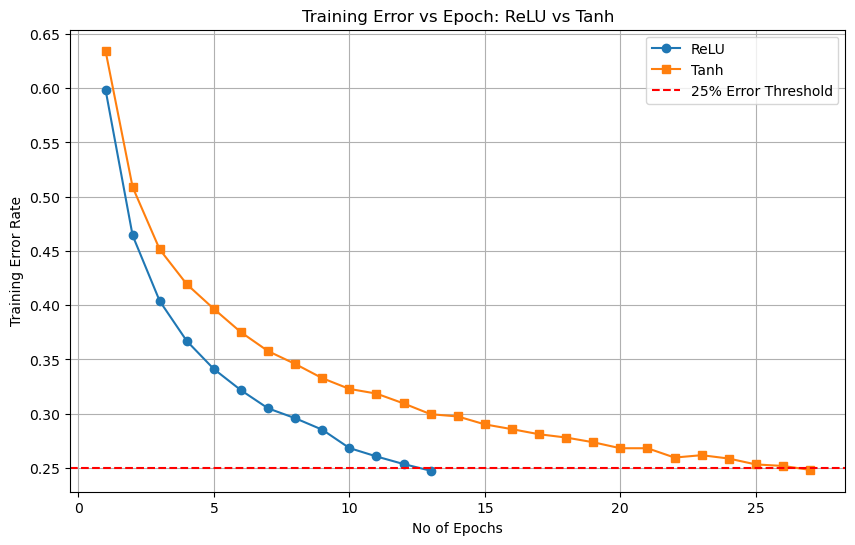

In [81]:
#Plot figure between training error and epoch
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(relu_errors)+1), relu_errors, marker='o', label='ReLU')
plt.plot(range(1, len(tanh_errors)+1), tanh_errors, marker='s', label='Tanh')
plt.axhline(y=0.25, color='red', linestyle='--', label='25% Error Threshold')
plt.xlabel('No of Epochs')
plt.ylabel('Training Error Rate')
plt.title('Training Error vs Epoch: ReLU vs Tanh')
plt.legend()
plt.grid(True)
plt.show()

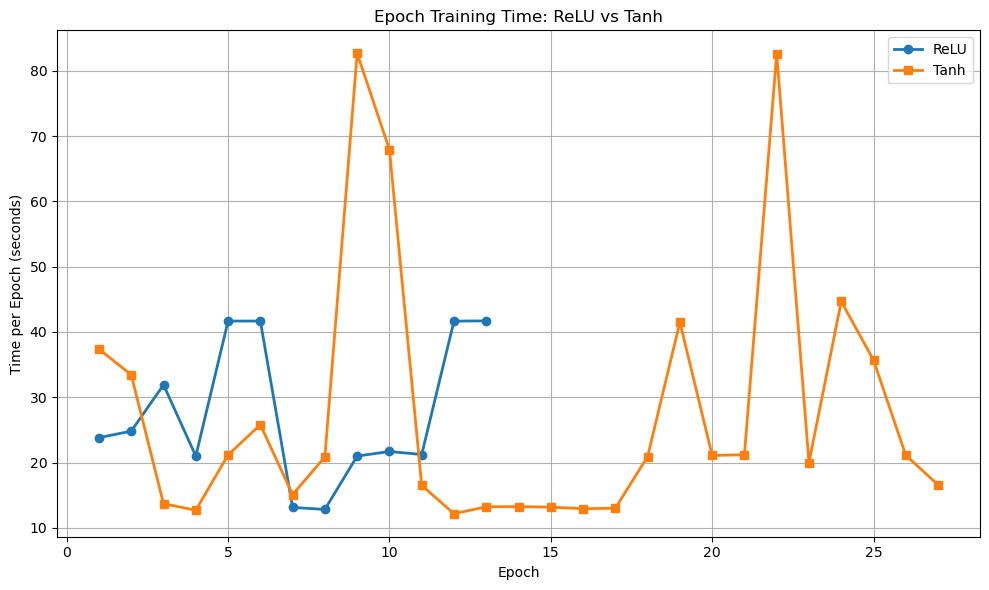

In [83]:
# Plot between training time vs epoch for relu and tanh
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(relu_time) + 1), relu_time, marker='o', label='ReLU', linewidth=2)
plt.plot(range(1, len(tanh_time) + 1), tanh_time, marker='s', label='Tanh', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Time per Epoch (seconds)')
plt.title('Epoch Training Time: ReLU vs Tanh')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()